## Activation Functions

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fig(x,y,title):
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('act(x)')
#     plt.show()

a = np.linspace(-10, 10, num=100)
a

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

#### Sigmoid Function
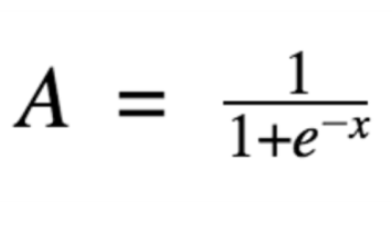

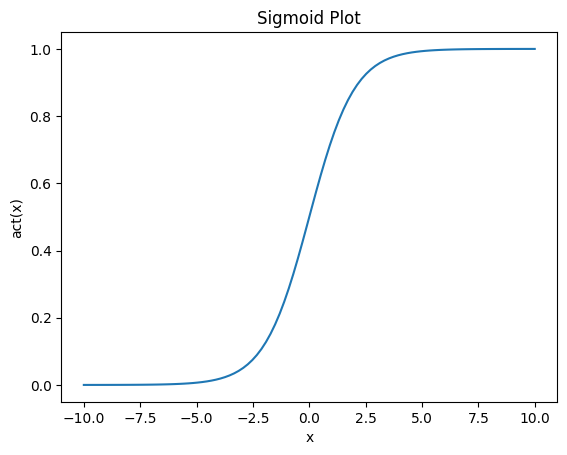

In [2]:
sig = 1/(1+ np.exp(-a))

plot_fig(a,sig,"Sigmoid Plot")

#### ReLU

relu(x) = max(0,x)

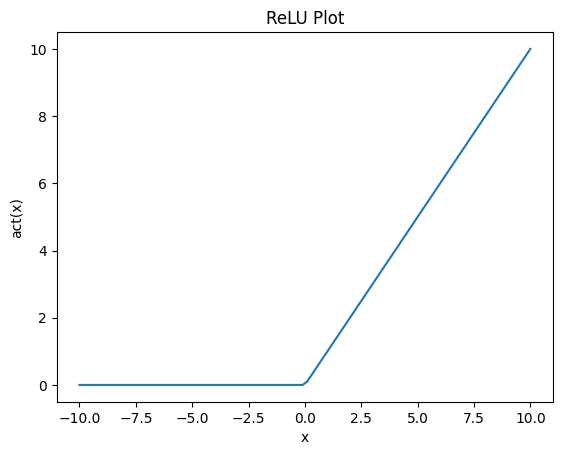

In [10]:
def relu(a):
    return np.maximum(0,a)

plot_fig(a,relu(a),"ReLU Plot")

#### Leaky Relu

leaky_relu(x) = max(0.1x,x)

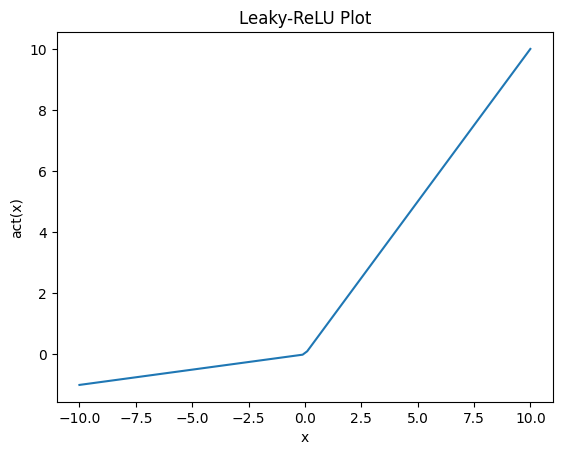

In [4]:
leak_relu = np.maximum(0.1*a,a)

plot_fig(a,leak_relu,"Leaky-ReLU Plot")

#### Tanh
<!-- ![image.png](atbaad9c00ba31.png) -->
value from -1 to 1 \
tanh(x) = (e^x - e^-x)/(e^x + e^-x)

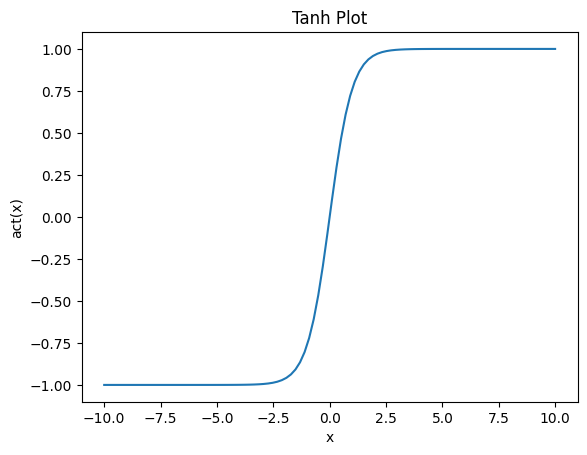

In [5]:
tanh = (np.exp(a) - np.exp(-a)) / (np.exp(a) + np.exp(-a))

plot_fig(a,tanh,"Tanh Plot")

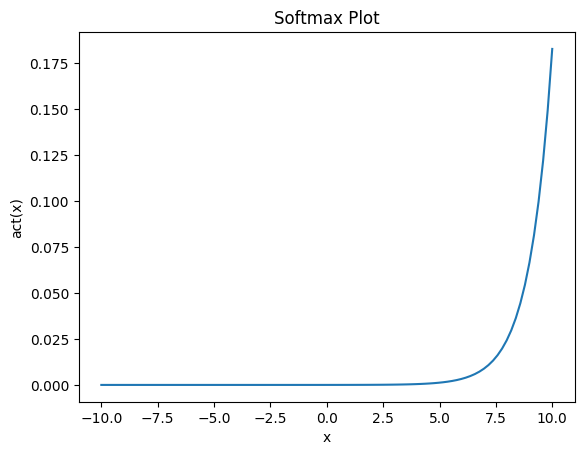

In [8]:
def softmax(a):
    return np.exp(a)/np.sum(np.exp(a))

plot_fig(a,softmax(a),"Softmax Plot")

## How ReLu behaves with two linear layers

pred = relu(w2\*relu(w1*x + b1) + b2)

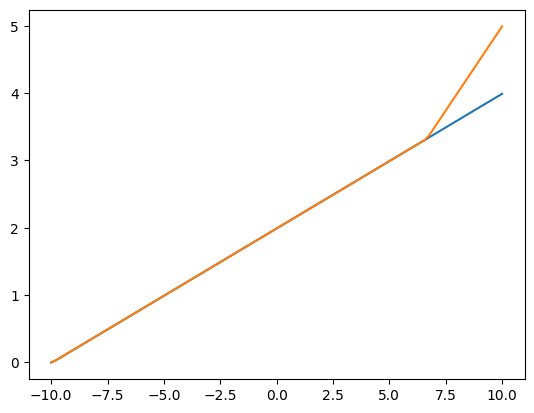

In [27]:
w1 = 0.2
b1 = 1.99
w2 = 0.3
b2 = -2

prediction = lambda x,w=0.2,b=1.99: x * w + b

layer1_1 = np.maximum(0, prediction(x))
plt.plot(x, layer1_1)

layer1_2 = np.maximum(0, prediction(x, .3, -2))
plt.plot(x, layer1_1+layer1_2)

In [ ]:
## training aspects

# 1) Forward Pass:
    activation(wT * x + b)
    
    # for this make a linear layer
    def Linear(inp: int,
               out: int):
        w = np.random.rand(3,2)
        
    
# 2) loss MSE

# 3) backward




## Building from scratch

In [108]:
import numpy as np
from sklearn.model_selection import train_test_split
from typing import Dict, List, Tuple
from statistics import mean

In [189]:
import numpy as np
from sklearn.model_selection import train_test_split
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt

np.random.seed(42)

class Neural:
    def __init__(self, layers: List[int], epochs: int,
                 learning_rate: float = 0.001, batch_size: int = 32,
                 validation_split: float = 0.2, verbose: int = 1):
        self._layer_structure: List[int] = layers
        self._batch_size: int = batch_size
        self._epochs: int = epochs
        self._learning_rate: float = learning_rate
        self._validation_split: float = validation_split
        self._verbose: int = verbose
        self._losses: Dict[str, List[float]] = {"train": [], "validation": []}
        self._is_fit: bool = False
        self.__layers = None
    
    ## util Functions
    def __init_layers(self) -> List[np.ndarray]:
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.randn(self._layer_structure[i-1], self._layer_structure[i]) * np.sqrt(2 / self._layer_structure[i-1]),  # Xavier initialization
                np.zeros((1, self._layer_structure[i]))
            ])  # list of two arrays , one for weight (ele are in range -0.1 to 0.1) and other for bias
        return layers
        
    def __forward(self, batch: np.ndarray) -> Tuple[np.ndarray, List[np.ndarray]]:
        hidden = [batch]  # this will create [array(batch)] object
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]  # do matrix multiplication
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)  # ReLU activation
            # Store the forward pass to use in backprop
            hidden.append(batch)
        return batch, hidden
    
    def __calculate_loss(self, actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        return predicted - actual
    
    def __calculate_mse(self, actual: np.ndarray, predicted: np.ndarray) -> float:
        return np.mean((actual - predicted) ** 2)
    
    def __backward(self, hidden: List[np.ndarray], grad: np.ndarray) -> None:
        for i in range(len(self.__layers) - 1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))  # ReLU derivative
            
            w_grad = hidden[i].T @ grad / self._batch_size
            b_grad = np.mean(grad, axis=0)
            
            self.__layers[i][0] -= self._learning_rate * w_grad
            self.__layers[i][1] -= self._learning_rate * b_grad
            
            grad = grad @ self.__layers[i][0].T
        return
    
    ## main functions
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        
        # initialize the layers
        self.__layers = self.__init_layers()
        num_samples = X.shape[0]
        
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(0, num_samples, self._batch_size):
                # get batch
                x_batch = X[i:i + self._batch_size]
                y_batch = y[i:i + self._batch_size]
                
                # forward
                pred, hidden = self.__forward(x_batch)
                
                # calculate loss
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                
                # backward
                self.__backward(hidden, loss)
                
            valid_preds, _ = self.__forward(X_val)
            train_loss = np.mean(epoch_losses)
            valid_loss = self.__calculate_mse(y_val, valid_preds)
            
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            
            if self._verbose:
                print(f"Epoch: {epoch}, Train MSE: {train_loss}, Valid MSE: {valid_loss}")
        
        self._is_fit = True
        return
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        if not self._is_fit:
            raise Exception("Model has not been trained yet")
        
        pred, _ = self.__forward(X)
        return pred
    
    def plot_learning(self) -> None:
        plt.plot(self._losses["train"], label="Train Loss")
        plt.plot(self._losses["validation"], label="Validation Loss")
        plt.legend()
        plt.show()


In [191]:
import numpy as np
import pandas as pd

def generate_data():
    # Define correlation values
    corr_a = 0.8
    corr_b = 0.4
    corr_c = -0.2
    
    # Generate independent features
    a = np.random.normal(0, 1, size=100000)
    b = np.random.normal(0, 1, size=100000)
    c = np.random.normal(0, 1, size=100000)
    d = np.random.randint(0, 4, size=100000)
    e = np.random.binomial(1, 0.5, size=100000)
    
    # Generate target feature based on independent features
    target = 50 + corr_a*a + corr_b*b + corr_c*c + d*10 + 20*e + np.random.normal(0, 10, size=100000)
    
    # Create DataFrame with all features
    df = pd.DataFrame({'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'target': target})
    return df

In [192]:
df = generate_data()

# Separate the features and target
X = df.drop('target',axis=1)
X

,a,b,c,d,e
0,0.496714,1.030595,1.561841,3,0
1,-0.138264,-1.155355,-0.094228,3,1
2,0.647689,0.575437,-1.329536,0,0
3,1.523030,-0.619238,-1.388638,0,0
4,-0.234153,-0.327403,-0.342651,0,0
...,...,...,...,...,...
99995,-0.225225,-1.264548,-0.432314,1,0
99996,-0.569778,0.565654,-0.687466,1,0
99997,0.409185,0.160020,-0.679638,3,1
99998,-0.211092,0.855673,-1.072092,3,0


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [194]:
y = df['target']

scaler = StandardScaler()
X = scaler.fit_transform(X) ## does standardization of data

X

array([[ 0.49530104,  1.03071196,  1.56358784,  1.33656321, -1.00356636],
       [-0.13910584, -1.15756939, -0.09273414,  1.33656321,  0.99644631],
       [ 0.64613953,  0.57506899, -1.32823011, -1.34109738, -1.00356636],
       ...,
       [ 0.40785076,  0.15920859, -0.67823338,  1.33656321,  0.99644631],
       [-0.21186766,  0.85560385, -1.07074695,  1.33656321, -1.00356636],
       [ 0.11898887, -1.06706615, -0.35639227, -0.44854385,  0.99644631]])

In [195]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

y_train.shape

(80000, 1)

In [196]:
X_train.shape

(80000, 5)

In [197]:
layer_structure = [X_train.shape[1],10,10,1]
nn = Neural(layer_structure, 20, 1e-5, 64, 0.2, 1)

Epoch: 0, Train MSE: 5692.349393851521, Valid MSE: 5047.195796334777
Epoch: 1, Train MSE: 2785.7218273127583, Valid MSE: 743.7816792540613
Epoch: 2, Train MSE: 340.8345918820234, Valid MSE: 201.05957533163968
Epoch: 3, Train MSE: 182.2754270303209, Valid MSE: 170.4363777969863
Epoch: 4, Train MSE: 163.01096996845445, Valid MSE: 155.8594341087337
Epoch: 5, Train MSE: 150.4655964114238, Valid MSE: 144.9777715184443
Epoch: 6, Train MSE: 140.9359154126679, Valid MSE: 136.62122184920776
Epoch: 7, Train MSE: 133.57647250984772, Valid MSE: 130.15464792225856
Epoch: 8, Train MSE: 127.8491249993071, Valid MSE: 125.12514669799805
Epoch: 9, Train MSE: 123.37415765844635, Valid MSE: 121.17655505630374
Epoch: 10, Train MSE: 119.84772841388305, Valid MSE: 118.03581767602373
Epoch: 11, Train MSE: 117.01592153193133, Valid MSE: 115.50368942788167
Epoch: 12, Train MSE: 114.71205160724992, Valid MSE: 113.4302814723099
Epoch: 13, Train MSE: 112.82624231190997, Valid MSE: 111.70916145284865
Epoch: 14, Tra

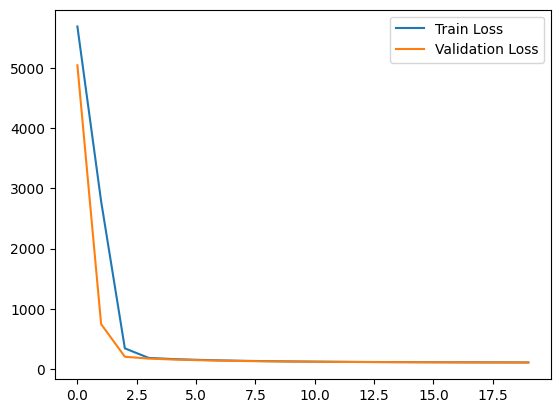

In [198]:
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()